# Regularyzacja

## Early stopping
Polega na zatrzymaniu uczenia w momencie kiedy wybrana metryka przestała się poprawiać dla danych walidacyjnych.
Keras pozwala na zaimplementowac tę metodę jako callback, który można podać jako parametr w metodzie `fit`, np.:

```python
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)

model.fit(..., callbacks=[early_stopping])
```

## Regularyzacja L1/L2

Do funkcji błędu dodawany jest dodatkowy termin penalizujący zbyt duże wagi:

$$ \tilde{J}(W) = J(W) + \lambda \sum_i w_i^2 $$
$$ \tilde{J}(W) = J(W) + \lambda \sum_i |w_i| $$

Aby zastosować tę metodę dla warstwy, należy ustawić parametr `kernel_regularizer`, np:

```python
tf.keras.layers.Dense(..., kernel_regularizer=tf.keras.regularizers.l2(0.01))
```

## Regularyzacja Dropout

Regularyzacja Dropout polega na losowym wyłączaniu pewnej części neuronów w sieci podczas uczenia.
Metodę tę można zaimplementowac dodając warstwę `Dropout` bezpośrednio po regularyzowanej warstwie.

## Augmentacja danych

Polega na wprowadzaniu drobnych zmian w danych treningowych. 
Technika ta jest szczególnie przydatna w przetwarzaniu obrazów. Różne transformacje można zastosować dodając odpowiednie warstwy na wejściu sieci, np.: `RandomRotation`, `RandomZoom`, `RandomBrightness`. Pełna lista dostępncyh transformacji: https://keras.io/api/layers/preprocessing_layers/image_augmentation/

## Zadania
1. Wczytaj zbiór `imdb` z Ćwiczeń 04. Zastosuj sieć wielowarstwową do klasyfikacji zbioru (możesz wykorzystać sieć z przykładu). Stwórz wykres pokazujący błąd dla danych treningowych/walidacyjnych w kolejnych epokach i zaobserwuj efekt przetrenowania. Następnie uruchom sieć ponownie, stosując Early Stopping aby zatrzymać uczenie w momencie, kiedy funkcja straty przestanie się zminiejszać dla danych walidacyjnych.
2. Dodaj do warstw ukrytych sieci z Zadania 1. regularyzację L1/L2. Dobierz odpowiednie wartości współczynnika regularyzacji. Trenuj sieci bez stosowania Early Stopping. Stwórz wykresy krzywych uczenia i porównaj działanie regularyzowanych sieci z siecią z Zadania 1.
3. Dodaj do warstw ukrytych sieci z Zadania 1. regularyzację Dropout. Dobierz odpowiedni parametr `rate`. Stwórz wykres krzywej uczenia i porównaj działanie sieci stosującej Dropout z siecią z Zadania 1.
4. Dodaj regularyzację dropout do wybranej sieci konwolucyjnej stworzonej na Ćwiczeniach 07. Porównaj działanie sieci przed/po dodaniu regularyzacji. -> TO NA KOLABIE


# ZADANIE1    

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       159,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,273 (626.07 KB)

 Trainable params: 160,273 (626.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7956 - loss: 0.4393 - val_accuracy: 0.8573 - val_loss: 0.3339
Epoch 2/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8827 - loss: 0.2832 - val_accuracy: 0.8698 - val_loss: 0.3129
Epoch 3/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9060 - loss: 0.2341 - val_accuracy: 0.8702 - val_loss: 0.3036
Epoch 4/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9184 - loss: 0.2026 - val_accuracy: 0.8678 - val_loss: 0.3299
Epoch 5/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9302 - loss: 0.1775 - val_accuracy: 0.8693 - val_loss: 0.3336
Epoch 6/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9380 - loss: 0.1570 - val_accuracy: 0.8341 - val_loss: 0.4950
Epoch 7/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9467 - loss: 0.1333 - val_accuracy: 0.8535 - val_loss: 0.4332
Epoch 8/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9540 - loss: 0.1155 - val_accuracy: 0.

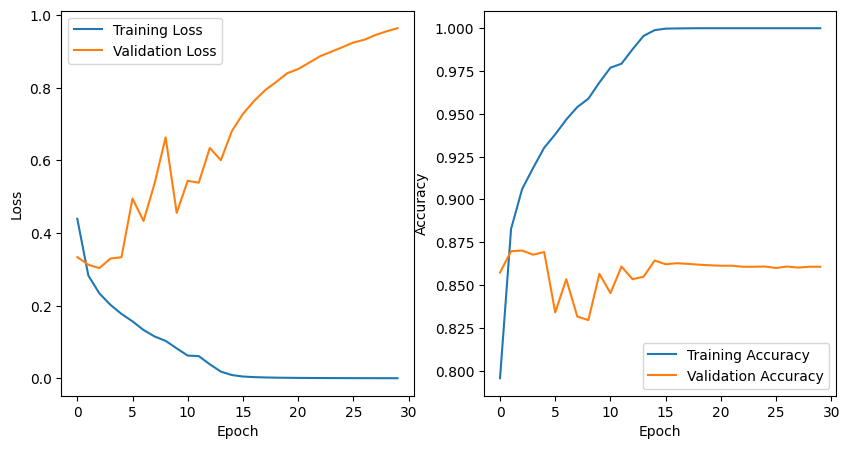

In [1]:
import tensorflow as tf
from keras.datasets import imdb
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

mlb = MultiLabelBinarizer()
mlb.fit(train_data + test_data)
X_train_full = mlb.transform(train_data)
y_train_full = train_labels
X_test = mlb.transform(test_data)
y_test = test_labels

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.33, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=32, epochs=30)
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
print(history.history.keys())
epoch = range(len(loss))

ax1.plot(epoch, loss, label="Training Loss")
ax1.plot(epoch, val_loss, label="Validation Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epoch, accuracy, label="Training Accuracy")
ax2.plot(epoch, val_accuracy, label="Validation Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       159,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,273 (626.07 KB)

 Trainable params: 160,273 (626.07 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       159,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,273 (626.07 KB)

 Trainable params: 160,273 (626.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7947 - loss: 0.4499 - val_accuracy: 0.8456 - val_loss: 0.3578
Epoch 2/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8836 - loss: 0.2866 - val_accuracy: 0.8594 - val_loss: 0.3359
Epoch 3/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9063 - loss: 0.2352 - val_accuracy: 0.8629 - val_loss: 0.3195
Epoch 4/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9183 - loss: 0.2061 - val_accuracy: 0.8407 - val_loss: 0.4068
Epoch 5/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9299 - loss: 0.1752 - val_accuracy: 0.8130 - val_loss: 0.4950
Epoch 6/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9370 - loss: 0.1590 - val_accuracy: 0.8584 - val_loss: 0.3905
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


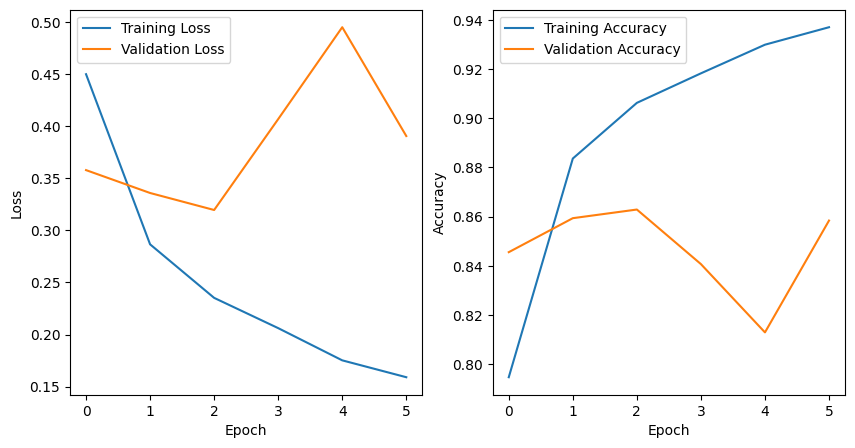

In [3]:
from keras.callbacks import EarlyStopping
import tensorflow as tf
from keras.datasets import imdb
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

mlb = MultiLabelBinarizer()
mlb.fit(train_data + test_data)
X_train_full = mlb.transform(train_data)
y_train_full = train_labels
X_test = mlb.transform(test_data)
y_test = test_labels

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.33, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

# ← DOPISANE:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=30,
    callbacks=[early_stopping]
)

import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
print(history.history.keys())
epoch = range(len(loss))

ax1.plot(epoch, loss, label="Training Loss")
ax1.plot(epoch, val_loss, label="Validation Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epoch, accuracy, label="Training Accuracy")
ax2.plot(epoch, val_accuracy, label="Validation Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()


# Zadanie2

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │       159,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,273 (626.07 KB)

 Trainable params: 160,273 (626.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7824 - loss: 1.1789 - val_accuracy: 0.8404 - val_loss: 0.5195
Epoch 2/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8431 - loss: 0.5104 - val_accuracy: 0.8548 - val_loss: 0.4769
Epoch 3/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8559 - loss: 0.4814 - val_accuracy: 0.8261 - val_loss: 0.5234
Epoch 4/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8614 - loss: 0.4656 - val_accuracy: 0.8515 - val_loss: 0.4773
Epoch 5/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8647 - loss: 0.4567 - val_accuracy: 0.8521 - val_loss: 0.4855
Epoch 6/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8681 - loss: 0.4488 - val_accuracy: 0.8531 - val_loss: 0.4798
Epoch 7/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8706 - loss: 0.4393 - val_accuracy: 0.8668 - val_loss: 0.4502
Epoch 8/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8744 - loss: 0.4328 - val_accuracy: 0.

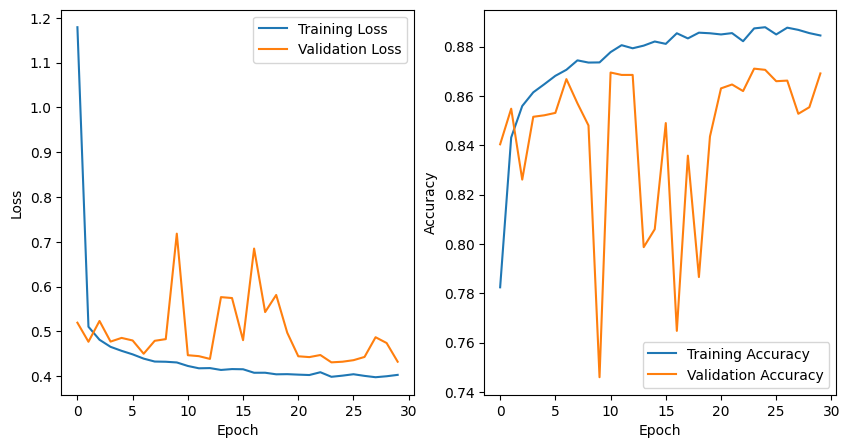

In [4]:
import tensorflow as tf
from keras.datasets import imdb
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras import regularizers

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

mlb = MultiLabelBinarizer()
mlb.fit(train_data + test_data)
X_train_full = mlb.transform(train_data)
y_train_full = train_labels
X_test = mlb.transform(test_data)
y_test = test_labels

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.33, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),

    #L1
    tf.keras.layers.Dense(
        16, activation="relu",
        kernel_regularizer=regularizers.l1(0.001)
    ),

    #L2
    tf.keras.layers.Dense(
        16, activation="relu",
        kernel_regularizer=regularizers.l2(0.001)
    ),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=32, epochs=30)
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
print(history.history.keys())
epoch = range(len(loss))

ax1.plot(epoch, loss, label="Training Loss")
ax1.plot(epoch, val_loss, label="Validation Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epoch, accuracy, label="Training Accuracy")
ax2.plot(epoch, val_accuracy, label="Validation Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()


# Zadanie3

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │       159,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,273 (626.07 KB)

 Trainable params: 160,273 (626.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6869 - loss: 0.6236 - val_accuracy: 0.8356 - val_loss: 0.4552
Epoch 2/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8090 - loss: 0.4799 - val_accuracy: 0.8648 - val_loss: 0.3773
Epoch 3/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8350 - loss: 0.4311 - val_accuracy: 0.8628 - val_loss: 0.3723
Epoch 4/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8494 - loss: 0.4115 - val_accuracy: 0.8714 - val_loss: 0.3647
Epoch 5/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8639 - loss: 0.3877 - val_accuracy: 0.8703 - val_loss: 0.3681
Epoch 6/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8776 - loss: 0.3655 - val_accuracy: 0.8599 - val_loss: 0.4026
Epoch 7/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8845 - loss: 0.3508 - val_accuracy: 0.8674 - val_loss: 0.3815
Epoch 8/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8876 - loss: 0.3451 - val_accuracy: 0.

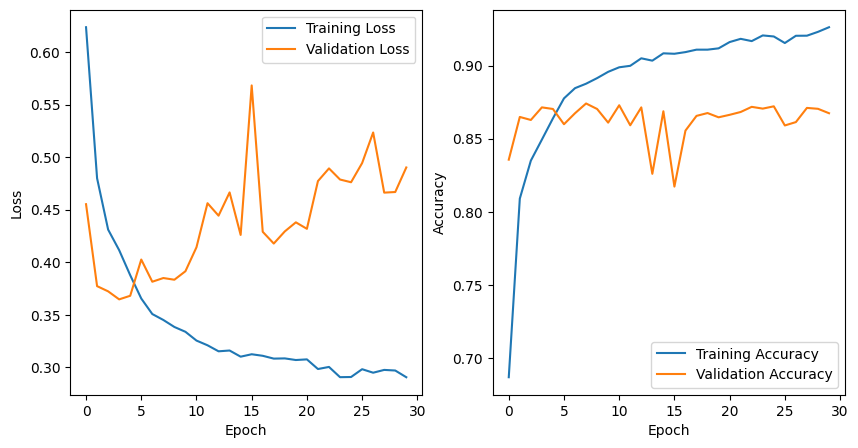

In [5]:
from keras import regularizers
import tensorflow as tf
from keras.datasets import imdb
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.layers import Dropout
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

mlb = MultiLabelBinarizer()
mlb.fit(train_data + test_data)
X_train_full = mlb.transform(train_data)
y_train_full = train_labels
X_test = mlb.transform(test_data)
y_test = test_labels

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.33, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),

    tf.keras.layers.Dense(
        16, activation="relu",
        kernel_regularizer=regularizers.l2(0.01)
    ),
    Dropout(0.5),

    tf.keras.layers.Dense(
        16, activation="relu",
        kernel_regularizer=regularizers.l2(0.01)
    ),
    Dropout(0.5),

    tf.keras.layers.Dense(1, activation="sigmoid")
])


model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=32, epochs=30)
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
print(history.history.keys())
epoch = range(len(loss))

ax1.plot(epoch, loss, label="Training Loss")
ax1.plot(epoch, val_loss, label="Validation Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epoch, accuracy, label="Training Accuracy")
ax2.plot(epoch, val_accuracy, label="Validation Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()


# Zadanie4 (odpalać na kolabie)

In [ ]:
import tensorflow as tf
image_size = (224, 224)
batch_size = 32

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, validation_split=0.2)

train = data_generator.flow_from_directory(
    "kagglecatsanddogs_5340/PetImages",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training') 

valid = data_generator.flow_from_directory(
    "kagglecatsanddogs_5340/PetImages",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

import matplotlib.pyplot as plt

def plot_training_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'validation'])

    # Loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'validation'])

    plt.show()

import tensorflow as tf

from keras.layers import Dropout

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    Dropout(0.25),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    Dropout(0.25),

    tf.keras.layers.Flatten(),
    Dropout(0.5),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

print("the weakest cnn")
model.summary()

history = model.fit(train, validation_data=valid, epochs=5)
plot_training_curves(history)
